##### Question 1:

In [ ]:
Part(a): 
    Ans: 2/3
Part(b):
    Ans: 2/3
Part(c):
    Ans: 1/4
Part(d): 
    Ans: 1/2
Part(e):
    Ans: 1/2
Part(f):
    Ans: 5/8

#### Question 2:

In [28]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
prob2 = pd.read_csv('logistic_coef.csv', header = 0)

In [ ]:
prob2['z_calc'] = prob2['Coef']/prob2['StdErr']

In [16]:
p_values = stats.norm.sf(abs(prob2['z_score']))*2
prob2['p_value'] = p_values
prob2['p_value'] = round(prob2['p_value'], 6)
prob2['imp_5%'] = (prob2['p_value'] <= 0.05)

In [17]:
prob2

,Var,Coef,StdErr,z_score,z_calc,p_value,imp_5%
0,Male,1.4500,0.09000,15.81,16.111111,0.000000,True
1,Female,-2.1100,0.10000,-21.95,-21.100000,0.000000,True
2,Ln_Equity_value,-0.1090,0.04100,-2.63,-2.658537,0.008538,True
3,Age,-0.0130,0.00960,-1.40,-1.354167,0.161513,False
4,Age_Sq,0.0001,0.00009,1.52,1.111111,0.128511,False
5,Sectortrades,1.7700,0.33000,5.37,5.363636,0.000000,True
6,CompanyY,2.0700,0.39900,5.18,5.187970,0.000000,True
7,CompanyZ,-0.8720,0.43700,-2.01,-1.995423,0.044431,True
8,Constan,1.2000,0.48400,2.48,2.479339,0.013138,True


In [39]:
equity_coef = -0.1090
equity_adam = np.log(50000)*equity_coef
print('equity_adam is {}'.format(equity_adam))
equity_bob = np.log(200000)*equity_coef
print('equity_bob is {}'.format(equity_bob))
equity_chris = np.log(40000)*equity_coef
print('equity_chris is {}'.format(equity_chris))
equity_david = np.log(190000)*equity_coef
print('equity_david is {}'.format(equity_david))

equity_adam is -1.1793558330007208
equity_bob is -1.330461918362789
equity_chris is -1.1550331859074718
equity_david is -1.324870949274546


In [30]:
odds = np.log(0.5)
print('odds is {}'.format(odds))

odds is -0.6931471805599453


In [40]:
logit_chris = (-1*equity_adam) + equity_chris
print('logit_chris is {}'.format(logit_chris))

logit_chris is 0.02432264709324894


In [41]:
p_chris = 1/(1 + np.exp(-logit_chris))
print('p_chris is {}'.format(p_chris))

p_chris is 0.5060803620188986


In [43]:
log_david = -1*equity_bob + equity_david
print('log_david is {}'.format(log_david))
p_david = 1/(1 + np.exp(-log_david))
print('p_david is {}'.format(p_david))

log_david is 0.00559096908824297
p_david is 0.5013977386310775


In [ ]:
Solution A:

In [ ]:
Solution B:

In [ ]:
Solution C:

Text(0,0.5,'-0.0130*Age + 0.0001*Age_sq')

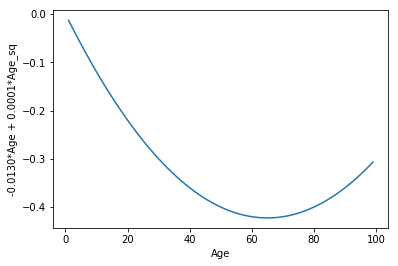

In [62]:
age_df = pd.DataFrame()
age = [i for i in range(1,100)]
age_sq = [i**2 for i in age]

age_df['age'] = age
age_df['age_sq'] = age_sq
age_df['age_cf'] = age_df['age']*-0.0130
age_df['age_sq'] = age_df['age_sq']*0.0001
age_df['logit'] = age_df['age_sq'] + age_df['age_cf']

plt.plot(age_df['age'], age_df['logit'])
plt.xlabel('Age')
plt.ylabel('-0.0130*Age + 0.0001*Age_sq')

##### Question 3:

In [ ]:
Part(a)

Select * from (SELECT us.City, COUNT(*)
FROM trades as ts
left Join
users as us on ts.User_id = us.User_id
where ((ts.Status = 'Cancelled') and (ts.Timestamp = '2016-12-01'))
group by us.City
order by 2 desc
)
where rownum <= 5;

In [ ]:
Part (b)

Select * from (Select t3.Symbol, COUNT(*) FROM
(Select * FROM
(Select userid, Price, Quantity, Symbol, Timestamp1 FROM Table1 where 
Side = 'buy') t1
INNER JOIN
(Select userid, Price, Quantity, Symbol, Timestamp1 FROM Table1 where 
Side = 'sell') t2
on (t1.Price = t2.Price) and (t1.Quantity = t2.Quantity) and (t1.Timestamp1 = t2.Timestamp1)) t3)
group by t1.Symbol
order by 2 desc;